<a href="https://colab.research.google.com/github/jamesakibble/data_prep_practice/blob/main/Copy_of_cheese_production_prep_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Created on 17/11/20
@author: James Kibble
'''

'\nCreated on 17/11/20\n@author: James Kibble\n'

In [ ]:
'''
This code aims to retrieve, assess, and clean a dataset for further analysis. The dataset concerns the production (tonnes) of 
'cheese, whole cow milk' between 2000 and 2014 from western countries involved in 2014 Russia sanctioning.
'''

"\nThis code aims to retrieve, assess, and clean a dataset for further analysis. The dataset concerns the production (tonnes) of \n'cheese, whole cow milk' between 2000 and 2014 from western countries involved in 2014 Russia sanctioning.\n"

# Data Preparation

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import cheese production csv as pandas dataframe and display first five rows
cheese_prod = pd.read_csv('combined_production.csv')
cheese_prod.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QP,Livestock Processed,10,Australia,5510,Production,901,"Cheese, whole cow milk",2000,2000,tonnes,373000,NaN,Official data
1,QP,Livestock Processed,10,Australia,5510,Production,901,"Cheese, whole cow milk",2001,2001,tonnes,376000,NaN,Official data
2,QP,Livestock Processed,10,Australia,5510,Production,901,"Cheese, whole cow milk",2002,2002,tonnes,412000,NaN,Official data
3,QP,Livestock Processed,10,Australia,5510,Production,901,"Cheese, whole cow milk",2003,2003,tonnes,379000,NaN,Official data
4,QP,Livestock Processed,10,Australia,5510,Production,901,"Cheese, whole cow milk",2004,2004,tonnes,384000,NaN,Official data


In [ ]:
# Examine total rows and columns withing the dataframe
cheese_prod.shape

(510, 14)

In [ ]:
# Replace column name whitespace to underscores and lowercase for easier analysis and consistency
cheese_prod.columns = cheese_prod.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
cheese_prod.head()

,domain_code,domain,area_code,area,element_code,element,item_code,item,year_code,year,unit,value,flag,flag_description
0,QP,Livestock Processed,10,Australia,5510,Production,901,"Cheese, whole cow milk",2000,2000,tonnes,373000,NaN,Official data
1,QP,Livestock Processed,10,Australia,5510,Production,901,"Cheese, whole cow milk",2001,2001,tonnes,376000,NaN,Official data
2,QP,Livestock Processed,10,Australia,5510,Production,901,"Cheese, whole cow milk",2002,2002,tonnes,412000,NaN,Official data
3,QP,Livestock Processed,10,Australia,5510,Production,901,"Cheese, whole cow milk",2003,2003,tonnes,379000,NaN,Official data
4,QP,Livestock Processed,10,Australia,5510,Production,901,"Cheese, whole cow milk",2004,2004,tonnes,384000,NaN,Official data


In [ ]:
# Using value_counts to check if all countries have same number of rows
cheese_prod.area.value_counts()

Norway                                                  15
Slovakia                                                15
Italy                                                   15
Australia                                               15
Finland                                                 15
Belgium                                                 15
Denmark                                                 15
Poland                                                  15
Portugal                                                15
Hungary                                                 15
Slovenia                                                15
Canada                                                  15
Austria                                                 15
Ireland                                                 15
France                                                  15
Romania                                                 15
Lithuania                                               

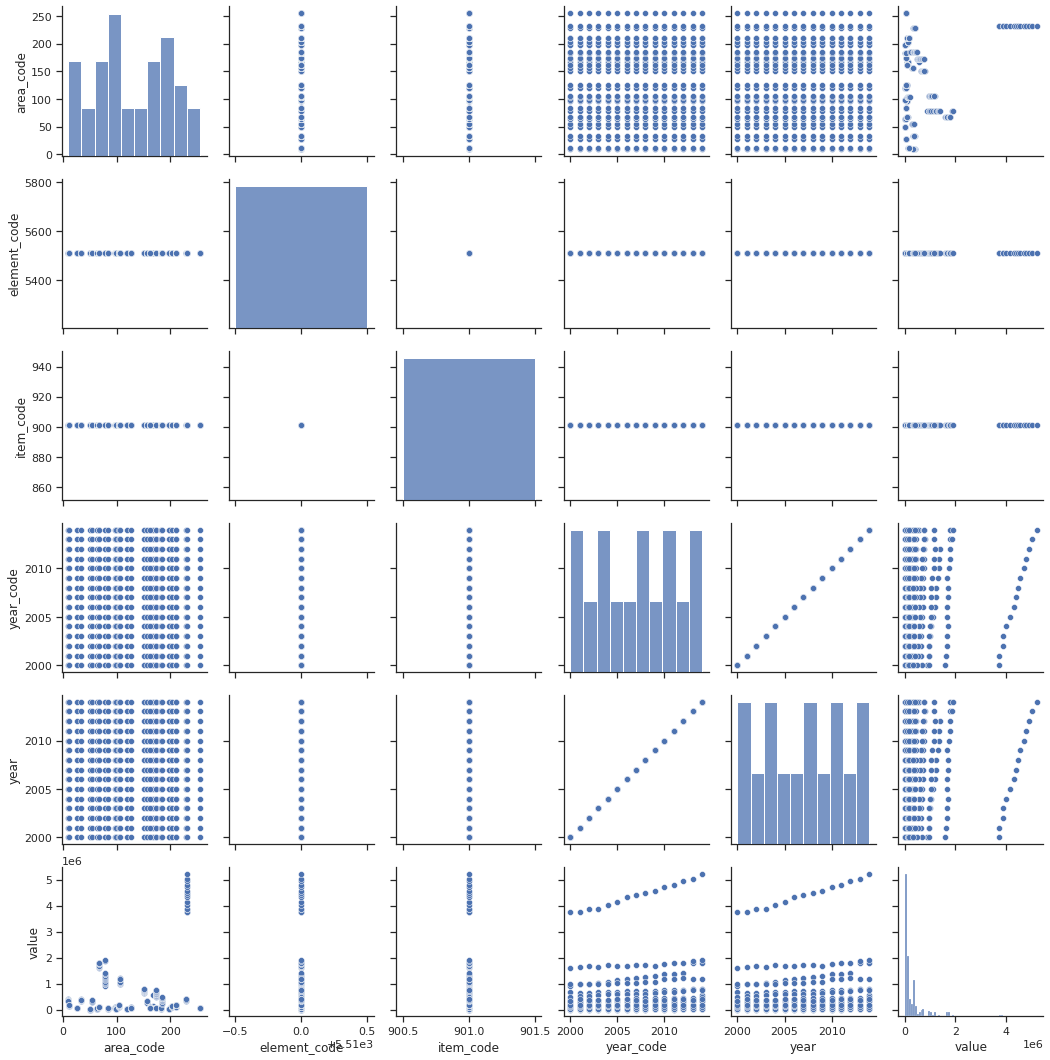

In [ ]:
# Quick visulisation to determine pointless/unnecessary columns
sns.pairplot(cheese_prod)

In [ ]:
# Determine presence of any null values
cheese_prod.isnull().sum()

domain_code           0
domain                0
area_code             0
area                  0
element_code          0
element               0
item_code             0
item                  0
year_code             0
year                  0
unit                  0
value                 0
flag                421
flag_description      0
dtype: int64

In [ ]:
# Manipulate and drop columns not needed for clarity
cheese_prod = cheese_prod.rename(columns = {'area': 'country', 'value': 'cheese_tonnes'})
cheese_prod = cheese_prod.drop(columns={'flag_description', 'flag', 'unit', 'year_code', 'element_code', 'domain_code', 'domain', 'item', 'item_code', 'element', 'area_code'})
cheese_prod.head()

,country,year,cheese_tonnes
0,Australia,2000,373000
1,Australia,2001,376000
2,Australia,2002,412000
3,Australia,2003,379000
4,Australia,2004,384000


In [ ]:
# Determining data columns are correct types, null values, and memory usage
cheese_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   country        510 non-null    object
 1   year           510 non-null    int64 
 2   cheese_tonnes  510 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 12.1+ KB


In [ ]:
# Removing index and saving dataframe as csv file 
# Ready for analysis
cheese_prod.to_csv('cheese_whole_milk_prod.csv', index=False) 

# Analysis 


In [ ]:
# pandas.agg for each country for quick initial analysis of each country
cheese_prod.groupby(['country']).cheese_tonnes.agg([min, max, sum])

,min,max,sum
country,,,
Australia,311460,412000,5429750
Austria,123912,177202,2274224
Belgium,43000,55800,732300
Bulgaria,50000,68590,914507
Canada,329630,387650,5427230
Croatia,20448,32300,394565
Cyprus,650,4000,22476
Czechia,101900,548000,2100163
Denmark,274800,369100,4856400


In [ ]:
# Sum of production values per country for bar plot visualisation
sum_cheese_prod = cheese_prod.groupby('country', as_index=False)['cheese_tonnes'].sum()

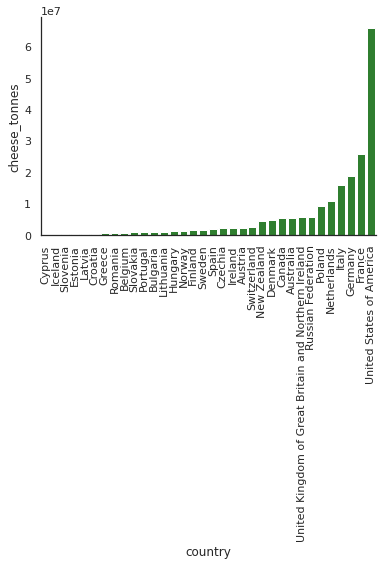

In [ ]:
# Barplot to visualise the overall production rates for each respective country
sns.set_theme(style="white")
ax=sns.barplot(x="country", y="cheese_tonnes", color="forestgreen", data=sum_cheese_prod, order=sum_cheese_prod.sort_values('cheese_tonnes').country)
plt.xticks(rotation=90)
plt.ylim()
sns.despine(top=True, right=True)

In [ ]:
#Keep top 12 countries for better visualisation and drop less significant countries
cheese_prod_filter = cheese_prod[~cheese_prod['country'].isin(['Switzerland', 'Austria', 'Ireland', 'Czechia', 'Spain', 'Sweden', 'Finland', 'Norway', 'Hungary', 'Lithuania', 'Bulgaria', 'Portugal', 'Slovakia', 'Romania', 'Greece', 'Croatia', 'Latvia', 'Estonia', 'Slovenia', 'Cyprus', 'Belgium', 'Iceland', 'New Zealand', 'Denmark'])]

(array([1998., 2000., 2002., 2004., 2006., 2008., 2010., 2012., 2014.,
        2016.]), <a list of 10 Text major ticklabel objects>)

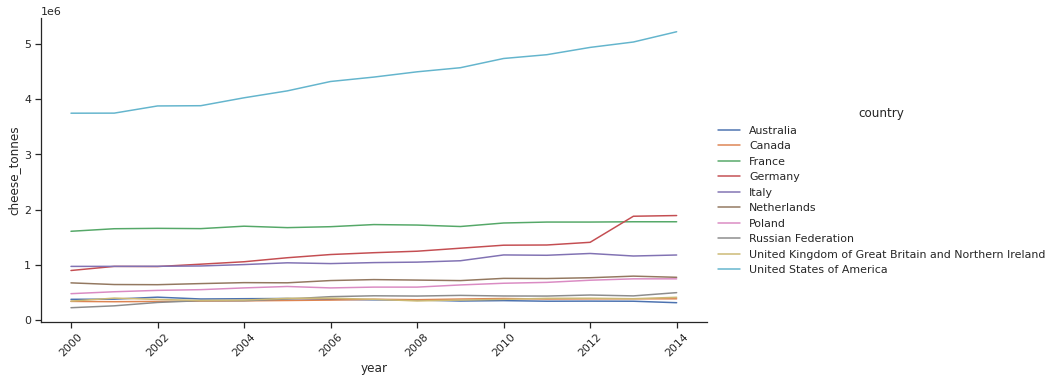

In [ ]:
# Line graph to show timeseries trends of most significant countires (Top 10)
sns.set_style('ticks')
sns.relplot(x="year", y="cheese_tonnes", data=cheese_prod_filter, hue='country', aspect=2, kind='line')
plt.ylim()
plt.xticks(rotation=45)

(array([1998., 2000., 2002., 2004., 2006., 2008., 2010., 2012., 2014.,
        2016.]), <a list of 10 Text major ticklabel objects>)

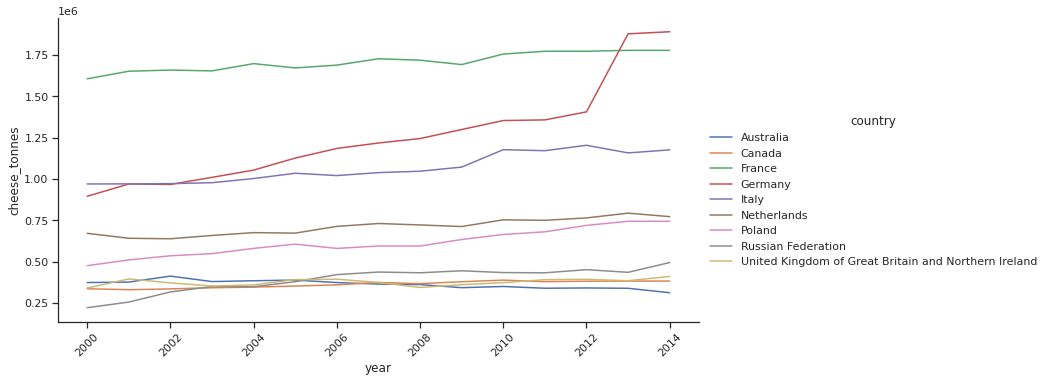

In [ ]:
#Removing USA for clearer viewability
cheese_prod_filter_2 = cheese_prod_filter[~cheese_prod_filter['country'].isin(['United States of America'])]
sns.set_style('ticks')
sns.relplot(x="year", y="cheese_tonnes", data=cheese_prod_filter_2, hue='country', aspect=2, kind='line')
plt.ylim()
plt.xticks(rotation=45)

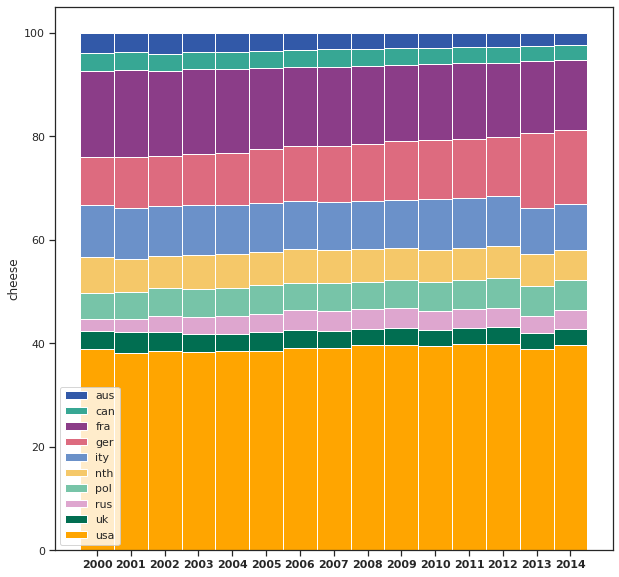

In [ ]:
#Percent stacked barchart to visualise cheese production percentage variation for each country over the time period
year = np.array(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'])
australia = np.array([373000, 376000, 412000, 379000, 384000, 388000, 373000, 363817, 360854, 342016, 349271, 338680, 340340, 338312, 311460])
canada = np.array([335620, 329630, 334628, 341570, 345480, 351782, 359083, 373660, 366438, 378049, 387650, 378520, 381000, 382060, 382060])
france = np.array([1606000, 1652000, 1659000, 1654000, 1698000, 1672000, 1689000, 1727410, 1718800, 1692210, 1755941, 1772932, 1773000, 1778365, 1778465])
germany = np.array([895236, 969600, 966800, 1009600, 1053700, 1126500, 1184600, 1217600, 1244600, 1299100, 1353600, 1357400, 1406000, 1878397, 1890996])
italy = np.array([969700, 970300, 971700, 977300, 1002600, 1034500, 1020500, 1038390, 1046860, 1071770, 1177163, 1171042, 1203760, 1157740, 1176020])
netherlands = np.array([671000, 641000, 638000, 658000, 675190, 672180, 713000, 730333, 721699, 712094, 752638, 749679, 764161, 793024, 771941])
poland = np.array([475200, 510000, 535000, 548000, 579800, 605500, 579620, 594140, 594000, 633470, 664100, 680000, 719000, 744000, 744000])
russia = np.array([220720, 255000, 316190, 348686, 347875, 378000, 421022, 436646, 432162, 444231, 433375, 432000, 451000, 435000, 494000])
uk = np.array([340000, 395000, 371000, 352000, 359000, 391000, 393300, 373700, 343400, 360000, 372500, 390600, 392700, 384000, 410000])
usa = np.array([3745765, 3746958, 3876980, 3881500, 4024800, 4150063, 4320267, 4400069, 4495614, 4569800, 4737045, 4805820, 4937922, 5035684, 5221857])
total = australia+ canada+ france+ germany+ italy+ netherlands+ poland+ russia+ uk+ usa
proportion_australia = np.true_divide(australia, total) * 100
proportion_canada = np.true_divide(canada, total) * 100
proportion_france = np.true_divide(france, total) * 100
proportion_germany = np.true_divide(germany, total) * 100
proportion_italy = np.true_divide(italy, total) * 100
proportion_netherlands = np.true_divide(netherlands, total) * 100
proportion_poland = np.true_divide(poland, total) * 100
proportion_russia = np.true_divide(russia, total) * 100
proportion_uk = np.true_divide(uk, total) * 100
proportion_usa = np.true_divide(usa, total) * 100
    
#add colors
colors = ['#3259A8', '#37A794', '#8B3D88', '#DD6B7F', '#6B91C9', '#F5C869', '#77C4A8', '#DEA6CF', '#016E51', '#FFA500']
# The position of the bars on the x-axis
r = range(len(year))
barWidth = 1
#plot bars
plt.figure(figsize=(10,10))
ax1 = plt.bar(r, proportion_australia, bottom=proportion_canada+proportion_france+proportion_germany+proportion_italy+proportion_netherlands+proportion_poland+proportion_russia+proportion_uk+proportion_usa, color=colors[0], edgecolor='white', width=barWidth, label="aus")
ax2 = plt.bar(r, proportion_canada, bottom=proportion_france+proportion_germany+proportion_italy+proportion_netherlands+proportion_poland+proportion_russia+proportion_uk+proportion_usa, color=colors[1], edgecolor='white', width=barWidth, label='can')
ax3 = plt.bar(r, proportion_france, bottom=proportion_germany+proportion_italy+proportion_netherlands+proportion_poland+proportion_russia+proportion_uk+proportion_usa, color=colors[2], edgecolor='white', width=barWidth, label='fra')
ax4 = plt.bar(r, proportion_germany, bottom=proportion_italy+proportion_netherlands+proportion_poland+proportion_russia+proportion_uk+proportion_usa, color=colors[3], edgecolor='white', width=barWidth, label='ger')
ax5 = plt.bar(r, proportion_italy, bottom=proportion_netherlands+proportion_poland+proportion_russia+proportion_uk+proportion_usa, color=colors[4], edgecolor='white', width=barWidth, label='ity')
ax6 = plt.bar(r, proportion_netherlands, bottom=proportion_poland+proportion_russia+proportion_uk+proportion_usa, color=colors[5], edgecolor='white', width=barWidth, label='nth')
ax7 = plt.bar(r, proportion_poland, bottom=proportion_russia+proportion_uk+proportion_usa, color=colors[6], edgecolor='white', width=barWidth, label='pol')
ax8 = plt.bar(r, proportion_russia, bottom=proportion_uk+proportion_usa, color=colors[7], edgecolor='white', width=barWidth, label='rus')
ax9 = plt.bar(r, proportion_uk, bottom=proportion_usa, color=colors[8], edgecolor='white', width=barWidth, label='uk')
ax10 = plt.bar(r, proportion_usa, color=colors[9], edgecolor='white', width=barWidth, label='usa')
plt.legend()
plt.xticks(r, year, fontweight='bold')
plt.ylabel("cheese")

plt.show()